**Imports**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score


**Reading Data**

In [ ]:
# Importing the Credit Card Default Dataset
data_train = pd.read_csv('/content/credit_card_dataset_train.csv')
data_train = data_train.sample(n=2000,replace =False,random_state=1)

In [ ]:
data_train.shape

(2000, 24)

**Data Analysis**

In [ ]:
data_train.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1755,50000,2,2,2,23,0,0,0,0,-1,...,8713,1781,1615,1400,1000,500,1781,0,0,0
1548,20000,2,2,1,26,0,0,0,0,0,...,18623,15692,15215,1600,1700,1509,1000,670,740,0
25944,130000,1,1,1,29,1,2,0,0,0,...,99119,101535,89883,5,6000,5000,5000,100207,1622,1
5112,290000,2,2,1,49,-1,-1,-1,-1,-1,...,2135,1591,5392,2334,707,2145,1599,5419,5039,1
9218,40000,2,2,2,25,2,0,0,0,2,...,29333,29816,30577,1750,1772,2311,1100,1400,0,1


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1755 to 21029
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   2000 non-null   int64
 1   SEX                         2000 non-null   int64
 2   EDUCATION                   2000 non-null   int64
 3   MARRIAGE                    2000 non-null   int64
 4   AGE                         2000 non-null   int64
 5   PAY_0                       2000 non-null   int64
 6   PAY_2                       2000 non-null   int64
 7   PAY_3                       2000 non-null   int64
 8   PAY_4                       2000 non-null   int64
 9   PAY_5                       2000 non-null   int64
 10  PAY_6                       2000 non-null   int64
 11  BILL_AMT1                   2000 non-null   int64
 12  BILL_AMT2                   2000 non-null   int64
 13  BILL_AMT3                   2000 non-null   int64
 14  BILL

In [ ]:
data_train.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,165965.000000,1.61600,1.842500,1.558500,35.521500,-0.037000,-0.146000,-0.171500,-0.236500,-0.294500,...,43548.159500,40234.428500,38573.999000,5380.694000,5681.640500,5160.995000,4653.205500,4483.259500,5338.475500,0.211500
std,128316.410976,0.48648,0.797503,0.519339,9.266524,1.115909,1.186334,1.185238,1.115433,1.077195,...,62027.587876,58594.641138,58588.614162,13916.224981,20027.200167,13919.334389,12767.236671,15486.976643,17731.989985,0.408474
min,10000.000000,1.00000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-34503.000000,-28335.000000,-51183.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.00000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2134.500000,1493.500000,1127.500000,1000.000000,780.000000,445.000000,293.500000,186.250000,246.500000,0.000000
50%,140000.000000,2.00000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19144.000000,18117.500000,16463.000000,2200.000000,2000.000000,1711.000000,1482.500000,1474.000000,1500.000000,0.000000
75%,230000.000000,2.00000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54583.250000,50832.500000,48705.750000,5341.250000,5000.000000,4709.000000,4167.250000,4000.000000,4006.500000,0.000000
max,750000.000000,2.00000,6.000000,3.000000,70.000000,7.000000,6.000000,7.000000,7.000000,7.000000,...,399493.000000,400993.000000,409615.000000,276698.000000,415552.000000,202129.000000,232242.000000,417990.000000,351282.000000,1.000000


In [ ]:
df = data_train.copy()

In [ ]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
df['SEX'].value_counts(dropna=False)

2    1232
1     768
Name: SEX, dtype: int64

In [ ]:
df['EDUCATION'].value_counts(dropna=False)

2    930
1    724
3    311
5     22
4     10
6      3
Name: EDUCATION, dtype: int64

In [ ]:
#changing variable names for ease
df = df.rename(columns={'default payment next month': 'default_payment',
                        'PAY_0': 'PAY_1'})
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
1755,50000,2,2,2,23,0,0,0,0,-1,...,8713,1781,1615,1400,1000,500,1781,0,0,0
1548,20000,2,2,1,26,0,0,0,0,0,...,18623,15692,15215,1600,1700,1509,1000,670,740,0
25944,130000,1,1,1,29,1,2,0,0,0,...,99119,101535,89883,5,6000,5000,5000,100207,1622,1
5112,290000,2,2,1,49,-1,-1,-1,-1,-1,...,2135,1591,5392,2334,707,2145,1599,5419,5039,1
9218,40000,2,2,2,25,2,0,0,0,2,...,29333,29816,30577,1750,1772,2311,1100,1400,0,1


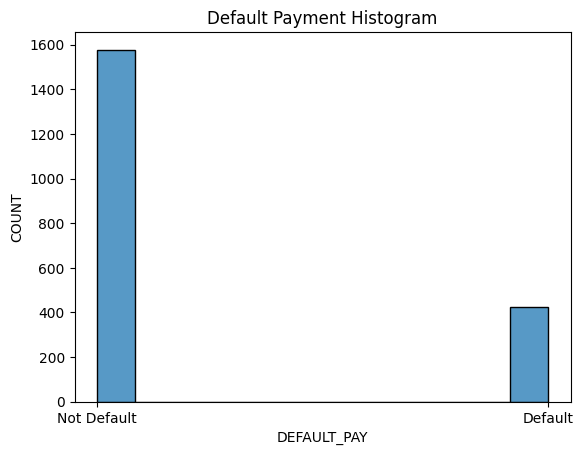

In [ ]:

#Histogram for default payments

sns.histplot(data=df, x='default_payment', kde=False)
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Payment Histogram')
plt.xticks([0, 1], ['Not Default', 'Default'])
plt.show()


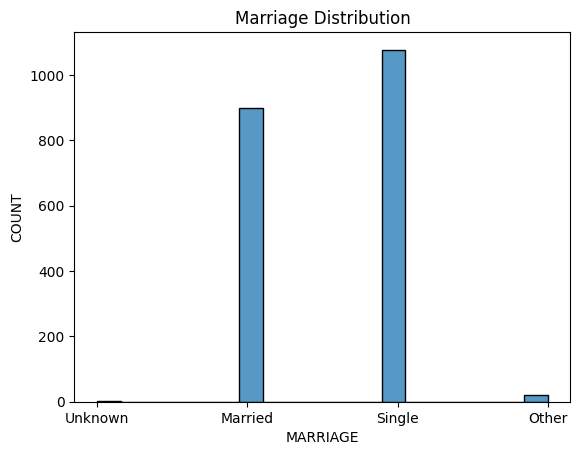

In [ ]:
#Marriage distribution

sns.histplot(data=df, x='MARRIAGE', kde=False)
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('Marriage Distribution')
plt.xticks([0, 1, 2, 3], ['Unknown', 'Married', 'Single', 'Other'])
plt.show()


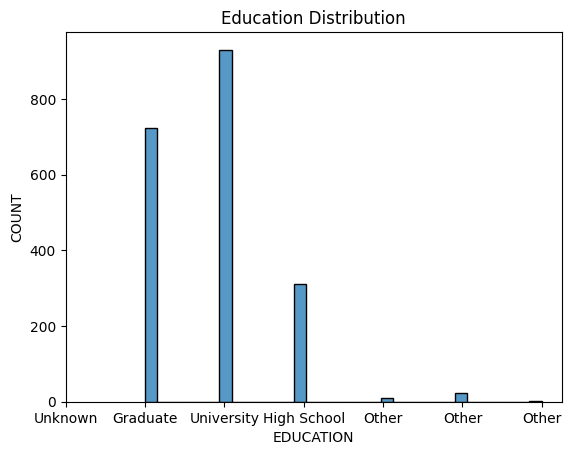

In [ ]:
#Education distribution
sns.histplot(data=df, x='EDUCATION', kde=False)
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('Education Distribution')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Unknown', 'Graduate', 'University', 'High School', 'Other', 'Other', 'Other'])
plt.show()


There are more female non default

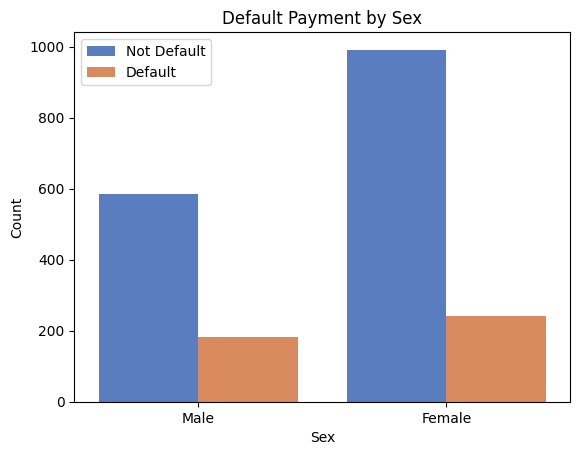

In [ ]:
#Default payment by sex
sns.countplot(x='SEX', data=df, hue='default_payment', palette='muted')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Default Payment by Sex')
plt.legend(['Not Default', 'Default'])
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

University students are highest non default

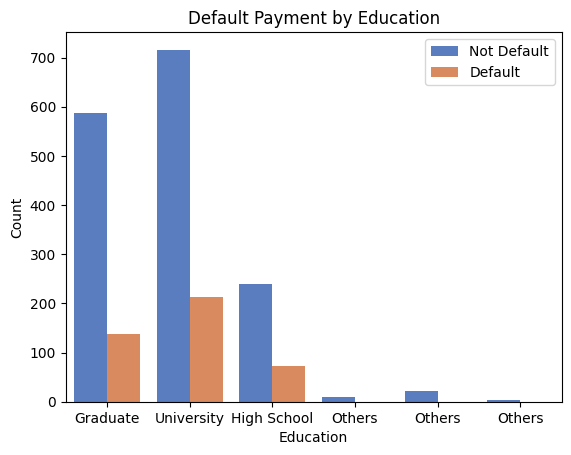

In [ ]:
#default payment by education
g = sns.countplot(x="EDUCATION", data=df, hue="default_payment", palette="muted")
g.set_xticklabels([ 'Graduate', 'University', 'High School', 'Others', 'Others', 'Others'])
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Default Payment by Education')
plt.legend(['Not Default', 'Default'])
plt.show()

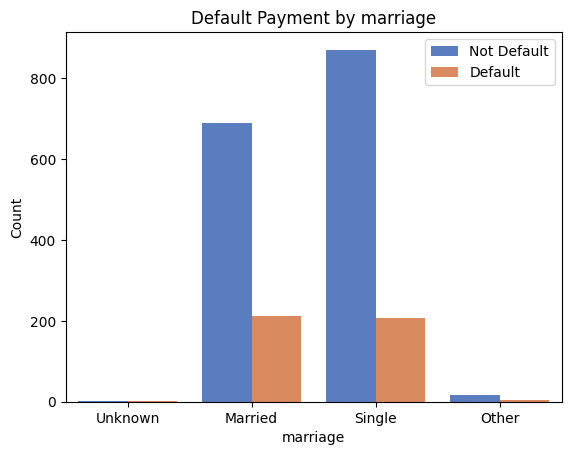

In [ ]:
g = sns.countplot(x="MARRIAGE", data=df, hue="default_payment", palette="muted")
g.set_xticklabels([ 'Unknown', 'Married', 'Single', 'Other'])
plt.xlabel('marriage')
plt.ylabel('Count')
plt.title('Default Payment by marriage')
plt.legend(['Not Default', 'Default'])
plt.show()

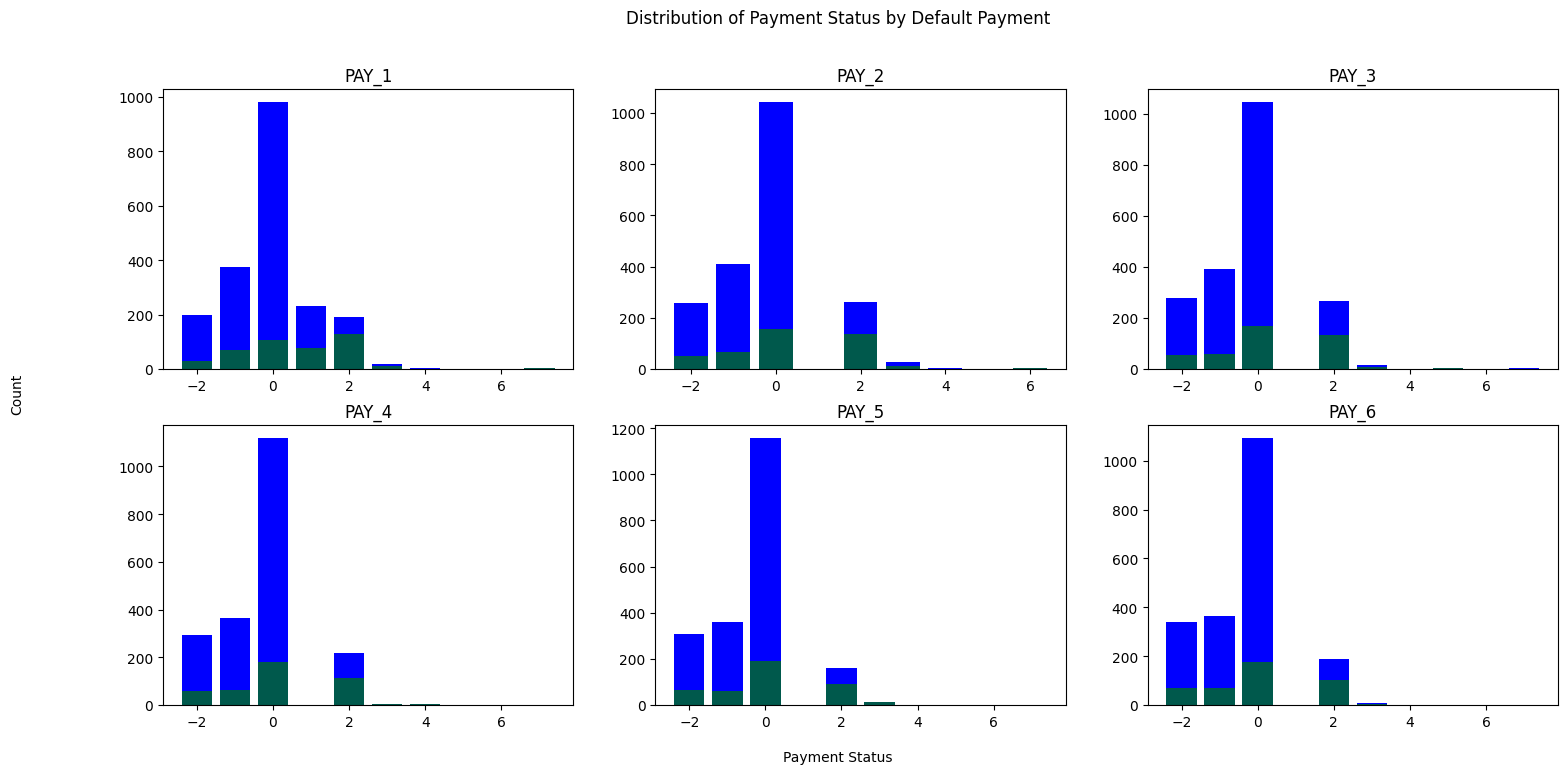

In [ ]:
# Define the column names with 'PAY_'
pay_columns = ['PAY_' + str(x) for x in range(1, 7)]

# Create a 2x3 subplot figure
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

# Iterate over each pay status column
for i, col in enumerate(pay_columns):
    # Determine the subplot row and column for the current pay status column
    row_idx, col_idx = divmod(i, 3)

    # Get the value counts for the current pay status column
    value_counts = df[col].value_counts()

    # Get the value counts for the current pay status column for customers who defaulted
    default_counts = df[col][df['default_payment'] == 1].value_counts()

    # Create a bar plot of the value counts
    axes[row_idx, col_idx].bar(value_counts.index, value_counts, align='center', color='blue')

    # Create a bar plot of the value counts for customers who defaulted, with transparency
    axes[row_idx, col_idx].bar(default_counts.index, default_counts, align='center', color='green', alpha=0.7)

    # Set the title of the subplot to the name of the pay status column
    axes[row_idx, col_idx].set_title(col)

# Add axis labels and title to the entire figure
fig.suptitle('Distribution of Payment Status by Default Payment')
fig.text(0.5, 0.04, 'Payment Status', ha='center')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')

# Display the figure
plt.show()



**Feature Engineering**

In [ ]:


# Load the dataset
test_df = pd.read_csv('/content/credit_card_dataset_test.csv')
# train_df = pd.read_csv('/content/credit_card_dataset_train.csv')
train_df = df.copy()



In [ ]:
test_df.shape

(3000, 24)

In [ ]:
X_train = train_df.drop('default_payment', axis=1)
y_train = train_df['default_payment']


Using SMOTE to account for class imbalance

In [ ]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)


Keeping a separate unsampled train set

In [ ]:
X_train.columns = X_train.columns.map(str.lower)


coln = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',       'pay_amt4', 'pay_amt5', 'pay_amt6']

scaler = StandardScaler()
X_train[coln] = scaler.fit_transform(X_train[coln])
# X_train[coln] = (X_train[coln]-np.mean(X_train[coln]))/np.std(X_train[coln])
# replace values 5, 6, and 0 in EDUCATION with 4
edu_vals = np.array([5, 6, 0])
X_train['education'] = np.where(X_train['education'].isin(edu_vals), 4, X_train['education'])

# replace 0 in MARRIAGE with 3
X_train['marriage'] = np.where(X_train['marriage'] == 0, 3, X_train['marriage'])

generated synthetic data using SMOTE

In [ ]:
print("Before resampling:\n", y_train.value_counts())
print("\nAfter resampling:\n", y_train_resampled.value_counts())


Before resampling:
 0    1577
1     423
Name: default_payment, dtype: int64

After resampling:
 0    1577
1    1577
Name: default_payment, dtype: int64


In [ ]:
X_train_resampled.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,50000,2,2,2,23,0,0,0,0,-1,...,14354,8713,1781,1615,1400,1000,500,1781,0,0
1,20000,2,2,1,26,0,0,0,0,0,...,18058,18623,15692,15215,1600,1700,1509,1000,670,740
2,130000,1,1,1,29,1,2,0,0,0,...,130477,99119,101535,89883,5,6000,5000,5000,100207,1622
3,290000,2,2,1,49,-1,-1,-1,-1,-1,...,704,2135,1591,5392,2334,707,2145,1599,5419,5039
4,40000,2,2,2,25,2,0,0,0,2,...,27794,29333,29816,30577,1750,1772,2311,1100,1400,0


Looking into MARRIAGE data

In [ ]:
X_train_resampled['MARRIAGE'].value_counts()

1    1730
2    1398
3      21
0       5
Name: MARRIAGE, dtype: int64

Looking into SEX data

In [ ]:
X_train_resampled['SEX'].value_counts()

2    1607
1    1547
Name: SEX, dtype: int64

Looking into EDUCATION data

In [ ]:
X_train_resampled['EDUCATION'].value_counts()

2    1494
1    1270
3     355
5      22
4      10
6       3
Name: EDUCATION, dtype: int64

In [ ]:
X_train_resampled.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,50000,2,2,2,23,0,0,0,0,-1,...,14354,8713,1781,1615,1400,1000,500,1781,0,0
1,20000,2,2,1,26,0,0,0,0,0,...,18058,18623,15692,15215,1600,1700,1509,1000,670,740
2,130000,1,1,1,29,1,2,0,0,0,...,130477,99119,101535,89883,5,6000,5000,5000,100207,1622
3,290000,2,2,1,49,-1,-1,-1,-1,-1,...,704,2135,1591,5392,2334,707,2145,1599,5419,5039
4,40000,2,2,2,25,2,0,0,0,2,...,27794,29333,29816,30577,1750,1772,2311,1100,1400,0


In [ ]:
X_train_resampled['PAY_6'].unique()

array([ 2,  0, -1, -2,  3,  5,  4,  6,  7,  1])

Converting feature names to lowercase for ease

In [ ]:
X_train_resampled.columns = X_train_resampled.columns.map(str.lower)

In [ ]:
X_train_resampled.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,50000,2,2,2,23,0,0,0,0,-1,...,14354,8713,1781,1615,1400,1000,500,1781,0,0
1,20000,2,2,1,26,0,0,0,0,0,...,18058,18623,15692,15215,1600,1700,1509,1000,670,740
2,130000,1,1,1,29,1,2,0,0,0,...,130477,99119,101535,89883,5,6000,5000,5000,100207,1622
3,290000,2,2,1,49,-1,-1,-1,-1,-1,...,704,2135,1591,5392,2334,707,2145,1599,5419,5039
4,40000,2,2,2,25,2,0,0,0,2,...,27794,29333,29816,30577,1750,1772,2311,1100,1400,0


Standardise the data using train set

In [ ]:


coln = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4','bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3','pay_amt4', 'pay_amt5', 'pay_amt6']

scaler1 = StandardScaler()
X_train_resampled[coln] = scaler1.fit_transform(X_train_resampled[coln])
# X_train_resampled[coln] = (X_train_resampled[coln]-np.mean(X_train_resampled[coln]))/np.std(X_train_resampled[coln])


In [ ]:
X_train_resampled.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,-0.816343,2,2,2,-1.390351,0,0,0,0,-1,...,-0.465994,-0.548490,-0.651068,-0.632881,-0.255344,-0.214016,-0.317712,-0.187910,-0.288467,-0.292115
1,-1.056919,2,2,1,-1.053142,0,0,0,0,0,...,-0.407838,-0.381724,-0.405910,-0.392583,-0.237693,-0.170538,-0.228648,-0.259813,-0.236705,-0.240665
2,-0.174806,1,1,1,-0.715934,1,2,0,0,0,...,1.357232,0.972868,1.106928,0.926720,-0.378460,0.096538,0.079502,0.108445,7.453170,-0.179342
3,1.108268,2,2,1,1.532119,-1,-1,-1,-1,-1,...,-0.680310,-0.659185,-0.654416,-0.566145,-0.172913,-0.232214,-0.172508,-0.204666,0.130186,0.058231
4,-0.896535,2,2,2,-1.165545,2,0,0,0,2,...,-0.254975,-0.201495,-0.156998,-0.121153,-0.224454,-0.166066,-0.157856,-0.250606,-0.180308,-0.292115


Replace values 5, 6, and 0 in EDUCATION with 4


In [ ]:
# replace values 5, 6, and 0 in EDUCATION with 4
edu_vals = np.array([5, 6, 0])
X_train_resampled['education'] = np.where(X_train_resampled['education'].isin(edu_vals), 4, X_train_resampled['education'])

# count the values in EDUCATION
edu_counts = X_train_resampled['education'].value_counts()
print(edu_counts)


2    1494
1    1270
3     355
4      35
Name: education, dtype: int64


replace 0 in MARRIAGE with 3

In [ ]:
# replace 0 in MARRIAGE with 3
X_train_resampled['marriage'] = np.where(X_train_resampled['marriage'] == 0, 3, X_train_resampled['marriage'])

# count the values in MARRIAGE
marriage_counts = X_train_resampled['marriage'].value_counts()
print(marriage_counts)


1    1730
2    1398
3      26
Name: marriage, dtype: int64


In [ ]:
X_train_resampled_copy = X_train_resampled.copy()


Do necessary feature engineering on test set

In [ ]:


test_df = test_df.rename(columns={'default payment next month': 'default_payment',
                        'PAY_0': 'PAY_1'})
test_df.columns = test_df.columns.map(str.lower)
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',       'pay_amt4', 'pay_amt5', 'pay_amt6']



X_test = test_df.drop('default_payment', axis=1)
y_test = test_df['default_payment']


In [ ]:


# replace values 5, 6, and 0 in EDUCATION with 4
edu_vals = np.array([5, 6, 0])
X_test['education'] = np.where(X_test['education'].isin(edu_vals), 4, X_test['education'])

# count the values in EDUCATION
edu_counts = X_test['education'].value_counts()
print(edu_counts)



# replace 0 in MARRIAGE with 3
X_test['marriage'] = np.where(X_test['marriage'] == 0, 3, X_test['marriage'])

# count the values in MARRIAGE
marriage_counts = X_test['marriage'].value_counts()
print(marriage_counts)


2    1434
1    1065
3     453
4      48
Name: education, dtype: int64
2    1624
1    1331
3      45
Name: marriage, dtype: int64


In [ ]:
X_test_nosample = X_test.copy()

Standardise test set using train set parameters

In [ ]:
# X_test_nosample[col_to_norm] = (X_test[col_to_norm]-np.mean(X_train[col_to_norm]))/np.std(X_train[col_to_norm])
# X_test[col_to_norm] = (X_test[col_to_norm]-np.mean(X_train_resampled[col_to_norm]))/np.std(X_train_resampled[col_to_norm])

X_test_nosample[col_to_norm] = scaler.transform(X_test_nosample[col_to_norm])
X_test[col_to_norm] = scaler1.transform(X_test[col_to_norm])

In [ ]:
X_test.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,-0.976727,1,2,1,-1.165545,-1,-1,-2,-1,2,...,-0.691364,-0.258946,-0.217499,-0.207484,-0.256314,-0.276126,1.926016,-0.259813,-0.288467,1.048573
1,-0.816343,2,3,1,1.756924,-1,-1,-1,-1,-2,...,-0.599043,-0.695113,-0.682455,-0.661416,-0.352425,0.089084,-0.361847,-0.351877,-0.288467,-0.292115
2,1.429036,1,1,2,0.970106,0,0,0,0,0,...,6.214704,6.106068,5.850261,4.539399,1.298041,0.593423,0.697390,1.029090,0.252328,0.194574
3,2.471534,2,3,1,0.745300,0,0,0,-2,-1,...,-0.135319,-0.695113,-0.653923,-0.594363,-0.237693,-0.214016,-0.361847,-0.202825,0.004721,-0.225786
4,1.348844,1,2,2,-0.715934,0,0,0,0,0,...,4.411779,4.727664,4.562895,4.667092,0.649275,0.500257,0.688563,0.615076,0.552547,0.405935


# **Code for sampled (SMOTE) training data.**

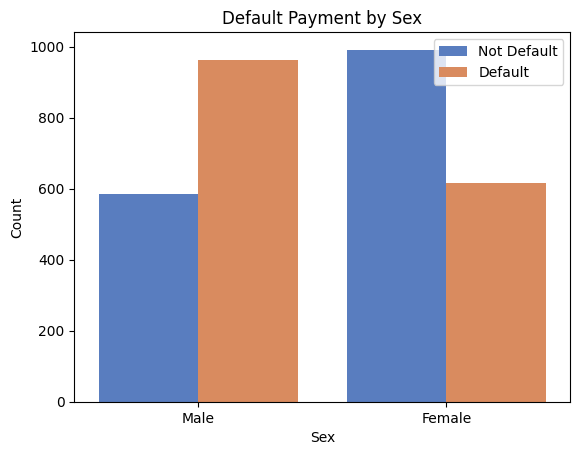

In [ ]:
#Default payment by sex
sns.countplot(x='sex', data=X_train_resampled, hue= y_train_resampled, palette='muted')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Default Payment by Sex')
plt.legend(['Not Default', 'Default'])
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

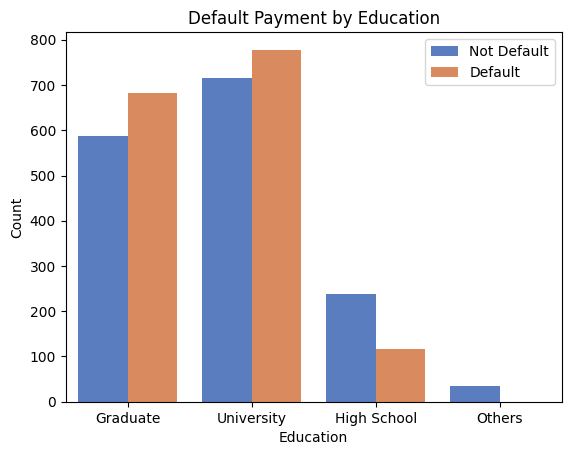

In [ ]:
#default payment by education
g = sns.countplot(x="education", data=X_train_resampled, hue= y_train_resampled , palette="muted")
g.set_xticklabels([ 'Graduate', 'University', 'High School', 'Others'])
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Default Payment by Education')
plt.legend(['Not Default', 'Default'])
plt.show()

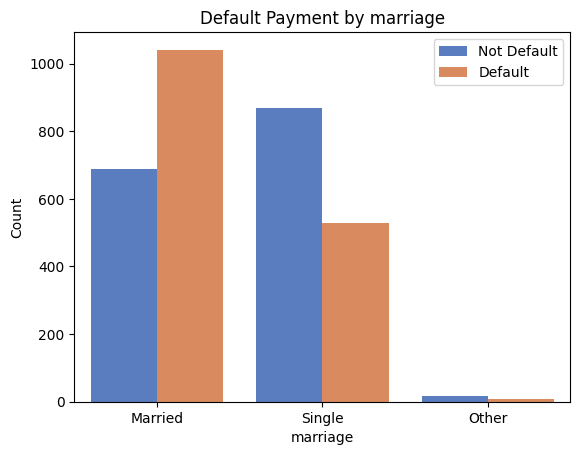

In [ ]:
g = sns.countplot(x="marriage", data=X_train_resampled, hue= y_train_resampled, palette="muted")
g.set_xticklabels([ 'Married', 'Single', 'Other'])
plt.xlabel('marriage')
plt.ylabel('Count')
plt.title('Default Payment by marriage')
plt.legend(['Not Default', 'Default'])
plt.show()

Cross-Validation Results:
Accuracy Score - Mean: 0.49810228158881087 Std: 0.011817739717076349
Trivial System Evaluation Metrics:
Accuracy: 0.5113
F1 Score: 0.3188
Confusion Matrix:
[[1191 1145]
 [ 321  343]]



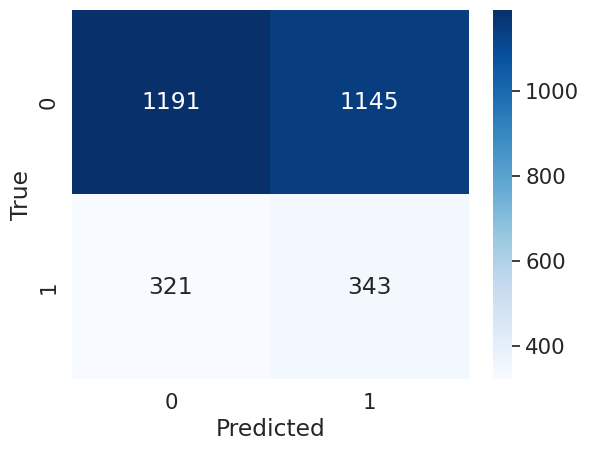

Baseline System Evaluation Metrics:
Cross-Validation Results:
Accuracy Score - Mean: 0.6556853570799689 Std: 0.025830021491562084
Accuracy: 0.6423
F1 Score: 0.4373
Confusion Matrix:
[[1510  826]
 [ 247  417]]


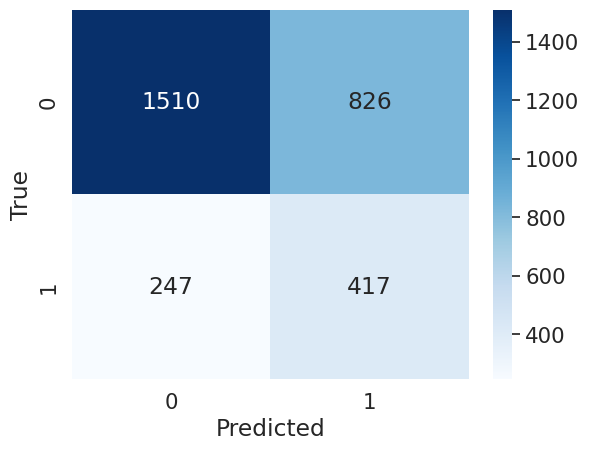

In [ ]:
#Baseline and trivial without using SMOTE train set.



# Trivial system: predict class assignments at random
trivial_model = DummyClassifier(strategy='stratified', random_state=1)
from sklearn.model_selection import cross_val_score

# Trivial system cross-validation

trivial_acc_cv = cross_val_score(trivial_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
f1_mean = trivial_acc_cv.mean()
f1_std = trivial_acc_cv.std()


trivial_model.fit(X_train_resampled, y_train_resampled)
y_pred_trivial = trivial_model.predict(X_test)

# Calculate evaluation metrics for the trivial system
trivial_acc = accuracy_score(y_test, y_pred_trivial)
trivial_f1 = f1_score(y_test, y_pred_trivial)
trivial_conf_matrix = confusion_matrix(y_test, y_pred_trivial)

# Baseline system: nearest means classifier
# Baseline system cross-validation
baseline_model = NearestCentroid()
baseline_acc_cv = cross_val_score(baseline_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
f1_mean1 = baseline_acc_cv.mean()
f1_std1 = baseline_acc_cv.std()



baseline_model.fit(X_train_resampled, y_train_resampled)
y_pred_baseline = baseline_model.predict(X_test)

# Calculate evaluation metrics for the baseline system
baseline_acc = accuracy_score(y_test, y_pred_baseline)
baseline_f1 = f1_score(y_test, y_pred_baseline)
baseline_conf_matrix = confusion_matrix(y_test, y_pred_baseline)

# Print the evaluation metrics for both systems
# Print the cross-validation results
print("Cross-Validation Results:")
print("Accuracy Score - Mean:", f1_mean, "Std:", f1_std)
print('Trivial System Evaluation Metrics:')
print(f'Accuracy: {trivial_acc:.4f}')
print(f'F1 Score: {trivial_f1:.4f}')
print(f'Confusion Matrix:\n{trivial_conf_matrix}\n')
sns.set(font_scale=1.4) # Adjust font size
sns.heatmap(trivial_conf_matrix, annot=True, fmt='g', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


print('Baseline System Evaluation Metrics:')
# Print the cross-validation results
print("Cross-Validation Results:")
print("Accuracy Score - Mean:", f1_mean1, "Std:", f1_std1)
print(f'Accuracy: {baseline_acc:.4f}')
print(f'F1 Score: {baseline_f1:.4f}')
print(f'Confusion Matrix:\n{baseline_conf_matrix}')
sns.set(font_scale=1.4) # Adjust font size
sns.heatmap(baseline_conf_matrix, annot=True, fmt='g', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Logistic Classifier

Cross-Validation Results:
Accuracy Score - Mean: 0.7387563202777149 Std: 0.054990873716533446
Test-set F1 score: 0.4385026737967915
Test-set accuracy: 0.685


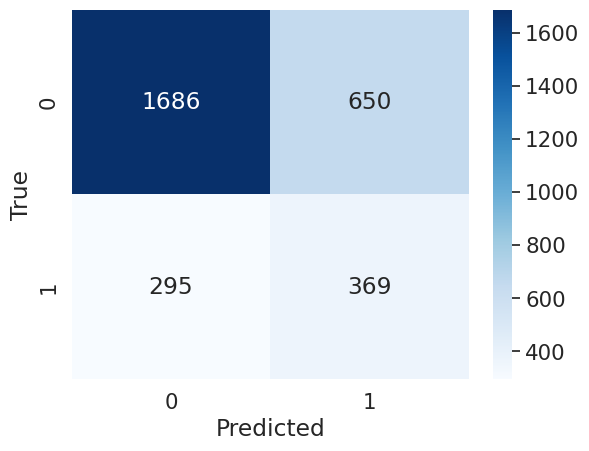

In [ ]:


from sklearn.model_selection import cross_val_score

logmodel = LogisticRegression(random_state=1)
# logmodel.fit(X_train_new,y_train_new)
scores = cross_val_score(logmodel, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
# Calculate the mean and standard deviation of the F1 scores
f1_mean = scores.mean()
f1_std = scores.std()

# Print the cross-validation results
print("Cross-Validation Results:")
print("Accuracy Score - Mean:", f1_mean, "Std:", f1_std)

best_model = LogisticRegression(random_state=1, C=0.1)
best_model.fit(X_train_resampled, y_train_resampled)
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Test-set F1 score:", f1)
print("Test-set accuracy:", acc)
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4) # Adjust font size
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()






XGBOOST

Cross-Validation Results:
Accuracy Score - Mean: 0.8341931426559002 Std: 0.06293141849082952
Test-set F1 score: 0.46165301563663436
Test-set accuracy: 0.759
Confusion Matrix:


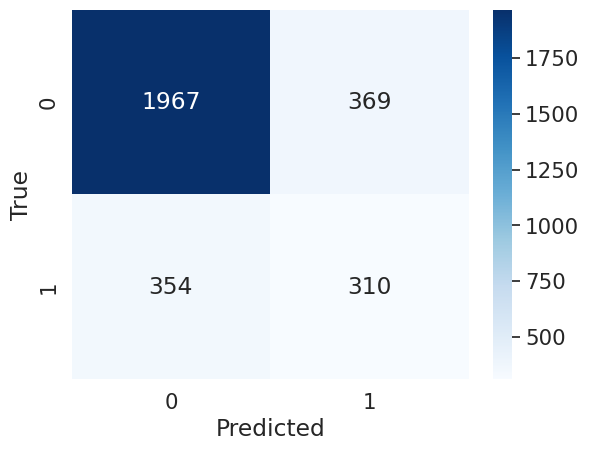

In [ ]:
from sklearn.model_selection import cross_val_score

# Define the best-fit model
best_model = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=1)

# Perform 5-fold cross-validation on the training set
scores = cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the F1 scores
f1_mean = scores.mean()
f1_std = scores.std()

# Print the cross-validation results
print("Cross-Validation Results:")
print("Accuracy Score - Mean:", f1_mean, "Std:", f1_std)

# Retrain the model on the full training set
best_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the final model on the test set
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Test-set F1 score:", f1)
print("Test-set accuracy:", acc)
cm = confusion_matrix(y_test, y_pred)
# Print the confusion matrix
print("Confusion Matrix:")
sns.set(font_scale=1.4) # Adjust font size
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

SVM

Cross-Validation Results:
Accuracy Score - Mean: 0.7866374864790079 Std: 0.058668069207553485
Test-set F1 score: 0.4526527871054399
Test-set accuracy: 0.7283333333333334


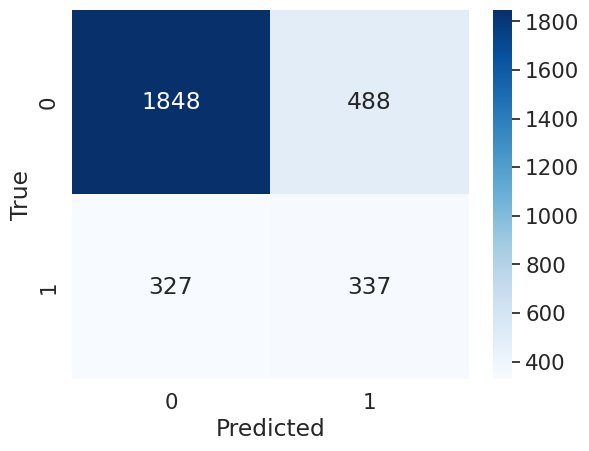

In [ ]:
from sklearn.model_selection import cross_val_score

svm = SVC(kernel='rbf', random_state=0)
scores = cross_val_score(svm, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
f1_mean = scores.mean()
f1_std = scores.std()

# Print the cross-validation results
print("Cross-Validation Results:")
print("Accuracy Score - Mean:", f1_mean, "Std:", f1_std)

best_model = SVC(kernel='rbf', random_state=0, C=1, gamma=0.1)
best_model.fit(X_train_resampled, y_train_resampled)
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Test-set F1 score:", f1)
print("Test-set accuracy:", acc)
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4) # Adjust font size
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
num_support_vectors = np.sum(best_model.n_support_)
num_misclassified = np.sum(y_pred != y_test)
dof = num_support_vectors + num_misclassified
print("Degrees of freedom:", dof)

Degrees of freedom: 2695


PCA and LDA

Best parameters for PCA-based SVM: {'C': 1, 'gamma': 10}
Best parameters for LDA-based SVM: {'C': 0.1, 'gamma': 0.1}
PCA-based SVM - Mean Accuracy: 0.7124362941161674 Std: 0.02714697328586225
LDA-based SVM - Mean Accuracy: 0.7441501270344376 Std: 0.05687715383422542
Best Classifier:
F1-score: 0.43208279430789126
Accuracy: 0.7073333333333334
Confusion Matrix:
[[1788  548]
 [ 330  334]]


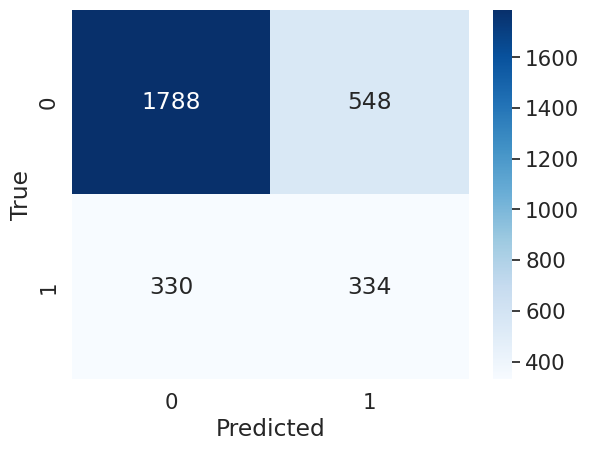

In [ ]:
# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)


# Apply LDA to reduce the dimensionality of the data
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_resampled, y_train_resampled)
X_test_lda = lda.transform(X_test)

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100]}

# Perform grid search on PCA-based SVM
svm_pca_gs = GridSearchCV(estimator=SVC(kernel='rbf', random_state=0),
                          param_grid=param_grid,
                          cv=5,
                          scoring='accuracy')
svm_pca_gs.fit(X_train_pca, y_train_resampled)
print("Best parameters for PCA-based SVM:", svm_pca_gs.best_params_)

# Perform grid search on LDA-based SVM
svm_lda_gs = GridSearchCV(estimator=SVC(kernel='rbf', random_state=0),
                          param_grid=param_grid,
                          cv=5,
                          scoring='accuracy')
svm_lda_gs.fit(X_train_lda, y_train_resampled)
print("Best parameters for LDA-based SVM:", svm_lda_gs.best_params_)

# Evaluate the best models using cross-validation
pca_scores = cross_val_score(svm_pca_gs.best_estimator_, X_train_pca, y_train_resampled, cv=5, scoring='accuracy')
f1_mean_pca = pca_scores.mean()
f1_std_pca = pca_scores.std()

lda_scores = cross_val_score(svm_lda_gs.best_estimator_, X_train_lda, y_train_resampled, cv=5, scoring='accuracy')
f1_mean_lda = lda_scores.mean()
f1_std_lda = lda_scores.std()

print("PCA-based SVM - Mean Accuracy:", f1_mean_pca, "Std:", f1_std_pca)
print("LDA-based SVM - Mean Accuracy:", f1_mean_lda, "Std:", f1_std_lda)

# Select the best model and fit it to the training data
if f1_mean_pca > f1_mean_lda:
    best_svm = svm_pca_gs.best_estimator_
    X_train_best = X_train_pca
    X_test_best = X_test_pca
else:
    best_svm = svm_lda_gs.best_estimator_
    X_train_best = X_train_lda
    X_test_best = X_test_lda

best_svm.fit(X_train_best, y_train_resampled)

# Compute and print the F1-score, accuracy, and confusion matrix for the best classifier
y_pred_best = best_svm.predict(X_test_best)
f1_best = f1_score(y_test, y_pred_best)
acc_best = accuracy_score(y_test, y_pred_best)
cm_best = confusion_matrix(y_test, y_pred_best)

print("Best Classifier:\nF1-score: {}\nAccuracy: {}\nConfusion Matrix:\n{}".format(f1_best, acc_best, cm_best))
sns.set(font_scale=1.4) # Adjust font size
sns.heatmap(cm_best, annot=True, fmt='g', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




Grid Search on XGBOOST

In [ ]:
param_grid_xgb = {'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 5, 7, 10], 'min_child_weight': [2, 3, 4, 5]}
xgb = XGBClassifier()
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

best_accuracy = grid_search_xgb.best_score_
print('Accuracy on Cross Validation set:', best_accuracy)

y_pred_xgb = grid_search_xgb.predict(X_test)
f1 = f1_score(y_test, y_pred_xgb)
acc = accuracy_score(y_test, y_pred_xgb)

print('F1 Score:', f1)
print('Accuracy:', acc)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_xgb))


Accuracy on Cross Validation set: 0.8630432923301387
F1 Score: 0.44339622641509435
Accuracy: 0.764
Confusion Matrix:
 [[2010  326]
 [ 382  282]]


In [ ]:
grid_search_xgb

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_child_weight': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

# **# Code for data without SMOTE.**

Cross-Validation Results:
Accuracy Score - Mean: 0.655 Std: 0.017818529681205467
Trivial System Evaluation Metrics:
Accuracy: 0.6553
F1 Score: 0.2009
Confusion Matrix:
[[1836  500]
 [ 534  130]]



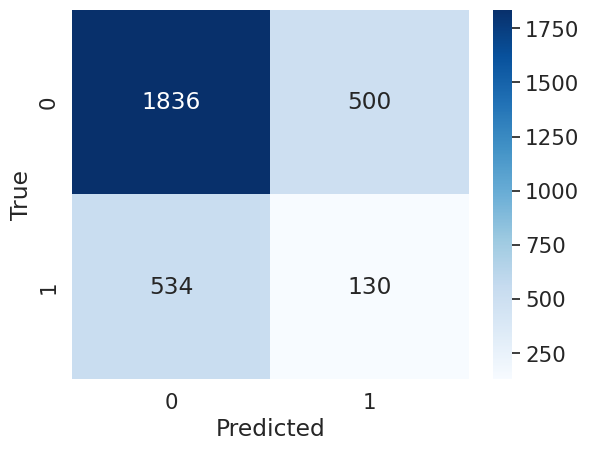

Baseline System Evaluation Metrics:
Cross-Validation Results:
Accuracy Score - Mean: 0.6420000000000001 Std: 0.01798610574860495
Accuracy: 0.6507
F1 Score: 0.4366
Confusion Matrix:
[[1546  790]
 [ 258  406]]


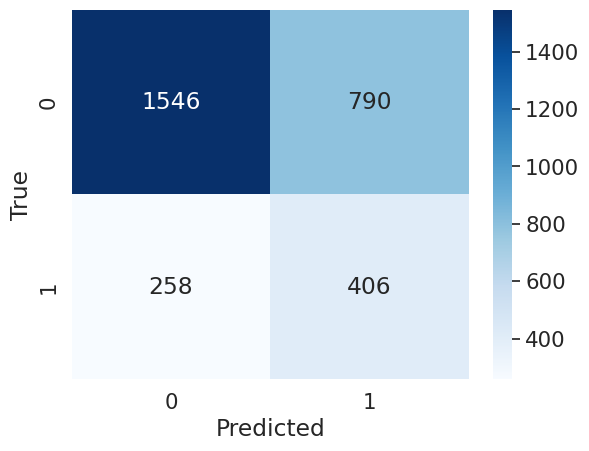

In [ ]:
#Baseline and trivial without using SMOTE train set.



# Trivial system: predict class assignments at random
trivial_model = DummyClassifier(strategy='stratified', random_state=1)
from sklearn.model_selection import cross_val_score

# Trivial system cross-validation

trivial_acc_cv = cross_val_score(trivial_model, X_train, y_train, cv=5, scoring='accuracy')
f1_mean = trivial_acc_cv.mean()
f1_std = trivial_acc_cv.std()


trivial_model.fit(X_train, y_train)
y_pred_trivial = trivial_model.predict(X_test_nosample)

# Calculate evaluation metrics for the trivial system
trivial_acc = accuracy_score(y_test, y_pred_trivial)
trivial_f1 = f1_score(y_test, y_pred_trivial)
trivial_conf_matrix = confusion_matrix(y_test, y_pred_trivial)

# Baseline system: nearest means classifier
# Baseline system cross-validation
baseline_model = NearestCentroid()
baseline_acc_cv = cross_val_score(baseline_model, X_train, y_train, cv=5, scoring='accuracy')
f1_mean1 = baseline_acc_cv.mean()
f1_std1 = baseline_acc_cv.std()



baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test_nosample)

# Calculate evaluation metrics for the baseline system
baseline_acc = accuracy_score(y_test, y_pred_baseline)
baseline_f1 = f1_score(y_test, y_pred_baseline)
baseline_conf_matrix = confusion_matrix(y_test, y_pred_baseline)

# Print the evaluation metrics for both systems
# Print the cross-validation results
print("Cross-Validation Results:")
print("Accuracy Score - Mean:", f1_mean, "Std:", f1_std)
print('Trivial System Evaluation Metrics:')
print(f'Accuracy: {trivial_acc:.4f}')
print(f'F1 Score: {trivial_f1:.4f}')
print(f'Confusion Matrix:\n{trivial_conf_matrix}\n')
sns.set(font_scale=1.4) # Adjust font size
sns.heatmap(trivial_conf_matrix, annot=True, fmt='g', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


print('Baseline System Evaluation Metrics:')
# Print the cross-validation results
print("Cross-Validation Results:")
print("Accuracy Score - Mean:", f1_mean1, "Std:", f1_std1)
print(f'Accuracy: {baseline_acc:.4f}')
print(f'F1 Score: {baseline_f1:.4f}')
print(f'Confusion Matrix:\n{baseline_conf_matrix}')
sns.set(font_scale=1.4) # Adjust font size
sns.heatmap(baseline_conf_matrix, annot=True, fmt='g', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Logistic Classifier

Cross-Validation Results:
Accuracy Score - Mean: 0.8055 Std: 0.009924716620639606
Test-set F1 score: 0.3127962085308057
Test-set accuracy: 0.8066666666666666


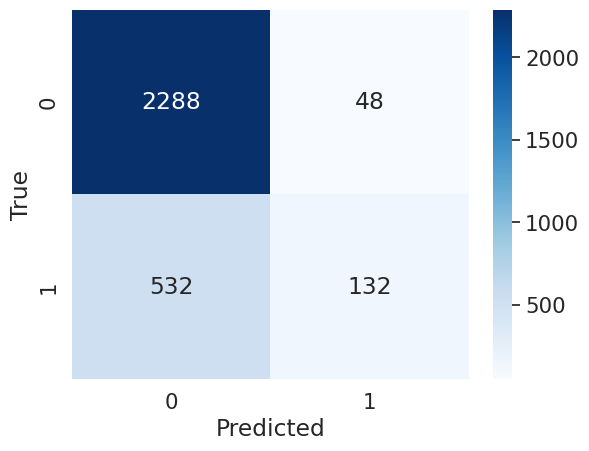

In [ ]:
logmodel1 = LogisticRegression(random_state=1)
# logmodel.fit(X_train_new,y_train_new)
scores = cross_val_score(logmodel1, X_train, y_train, cv=5, scoring='accuracy')
# Calculate the mean and standard deviation of the F1 scores
f1_mean = scores.mean()
f1_std = scores.std()

# Print the cross-validation results
print("Cross-Validation Results:")
print("Accuracy Score - Mean:", f1_mean, "Std:", f1_std)

best_model = LogisticRegression(random_state=1, C=0.1)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test_nosample)
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Test-set F1 score:", f1)
print("Test-set accuracy:", acc)
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4) # Adjust font size
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

XGBOOST

Cross-Validation Results:
Accuracy Score - Mean: 0.808 Std: 0.013076696830622014
Test-set F1 score: 0.4453125
Test-set accuracy: 0.8106666666666666
Confusion Matrix:


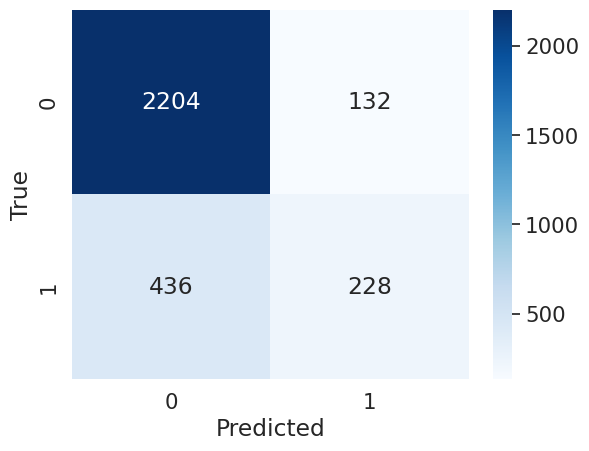

In [ ]:
from sklearn.model_selection import cross_val_score

# Define the best-fit model
best_model = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=1)

# Perform 5-fold cross-validation on the training set
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the F1 scores
f1_mean = scores.mean()
f1_std = scores.std()

# Print the cross-validation results
print("Cross-Validation Results:")
print("Accuracy Score - Mean:", f1_mean, "Std:", f1_std)

# Retrain the model on the full training set
best_model.fit(X_train, y_train)

# Evaluate the final model on the test set
y_pred = best_model.predict(X_test_nosample)
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Test-set F1 score:", f1)
print("Test-set accuracy:", acc)

# Print the confusion matrix
print("Confusion Matrix:")
sns.set(font_scale=1.4) # Adjust font size
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

SVM

Cross-Validation Results:
Accuracy Score - Mean: 0.8110000000000002 Std: 0.015779733838059504
Test-set F1 score: 0.37393162393162394
Test-set accuracy: 0.8046666666666666


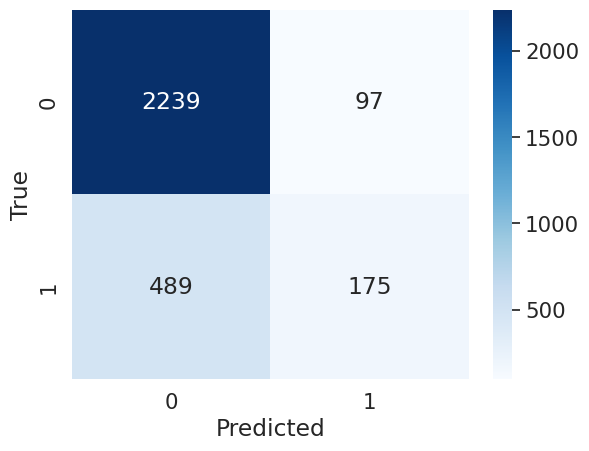

In [ ]:
svm = SVC(kernel='rbf', random_state=0)
scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
f1_mean = scores.mean()
f1_std = scores.std()

# Print the cross-validation results
print("Cross-Validation Results:")
print("Accuracy Score - Mean:", f1_mean, "Std:", f1_std)

best_model = SVC(kernel='rbf', random_state=0, C=1, gamma=0.1)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test_nosample)
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Test-set F1 score:", f1)
print("Test-set accuracy:", acc)
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4) # Adjust font size
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

PCA and LDA

Best parameters for PCA-based SVM: {'C': 1, 'gamma': 0.1}
Best parameters for LDA-based SVM: {'C': 100, 'gamma': 1}
PCA-based SVM - Mean Accuracy: 0.8109999999999999 Std: 0.013838352503098039
LDA-based SVM - Mean Accuracy: 0.8210000000000001 Std: 0.005147815070493479
Best Classifier:
F1-score: 0.4405113077679449
Accuracy: 0.8103333333333333
Confusion Matrix:
[[2207  129]
 [ 440  224]]


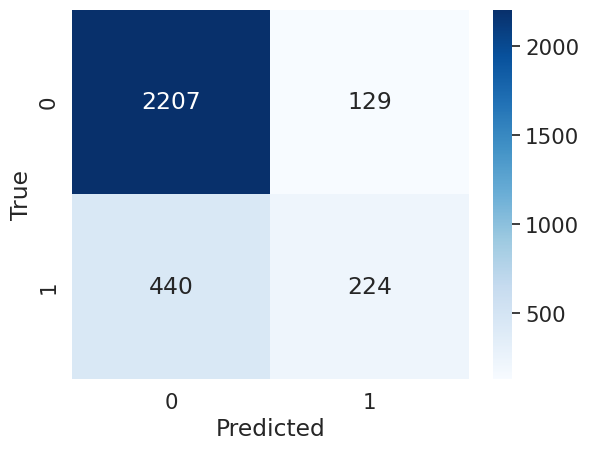

In [ ]:
# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test_nosample)


# Apply LDA to reduce the dimensionality of the data
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test_nosample)

# Define the parameter grid for SVM
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100]}

# Perform grid search on PCA-based SVM
svm_pca_gs = GridSearchCV(estimator=SVC(kernel='rbf', random_state=0),
                          param_grid=param_grid,
                          cv=5,
                          scoring='accuracy')
svm_pca_gs.fit(X_train_pca, y_train)
print("Best parameters for PCA-based SVM:", svm_pca_gs.best_params_)

# Perform grid search on LDA-based SVM
svm_lda_gs = GridSearchCV(estimator=SVC(kernel='rbf', random_state=0),
                          param_grid=param_grid,
                          cv=5,
                          scoring='accuracy')
svm_lda_gs.fit(X_train_lda, y_train)
print("Best parameters for LDA-based SVM:", svm_lda_gs.best_params_)

# Evaluate the best models using cross-validation
pca_scores = cross_val_score(svm_pca_gs.best_estimator_, X_train_pca, y_train, cv=5, scoring='accuracy')
f1_mean_pca = pca_scores.mean()
f1_std_pca = pca_scores.std()

lda_scores = cross_val_score(svm_lda_gs.best_estimator_, X_train_lda, y_train, cv=5, scoring='accuracy')
f1_mean_lda = lda_scores.mean()
f1_std_lda = lda_scores.std()

print("PCA-based SVM - Mean Accuracy:", f1_mean_pca, "Std:", f1_std_pca)
print("LDA-based SVM - Mean Accuracy:", f1_mean_lda, "Std:", f1_std_lda)

# Select the best model and fit it to the training data
if f1_mean_pca > f1_mean_lda:
    best_svm = svm_pca_gs.best_estimator_
    X_train_best = X_train_pca
    X_test_best = X_test_pca
else:
    best_svm = svm_lda_gs.best_estimator_
    X_train_best = X_train_lda
    X_test_best = X_test_lda

best_svm.fit(X_train_best, y_train)

# Compute and print the F1-score, accuracy, and confusion matrix for the best classifier
y_pred_best = best_svm.predict(X_test_best)
f1_best = f1_score(y_test, y_pred_best)
acc_best = accuracy_score(y_test, y_pred_best)
cm_best = confusion_matrix(y_test, y_pred_best)

print("Best Classifier:\nF1-score: {}\nAccuracy: {}\nConfusion Matrix:\n{}".format(f1_best, acc_best, cm_best))
sns.set(font_scale=1.4) # Adjust font size
sns.heatmap(cm_best, annot=True, fmt='g', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()






# **Featue Selection Performance**

Cross-Validation Results:
Accuracy Score - Mean: 0.7374915100747114 Std: 0.05950918035773082
Test-set F1 score: 0.43969102792632203
Test-set accuracy: 0.6856666666666666


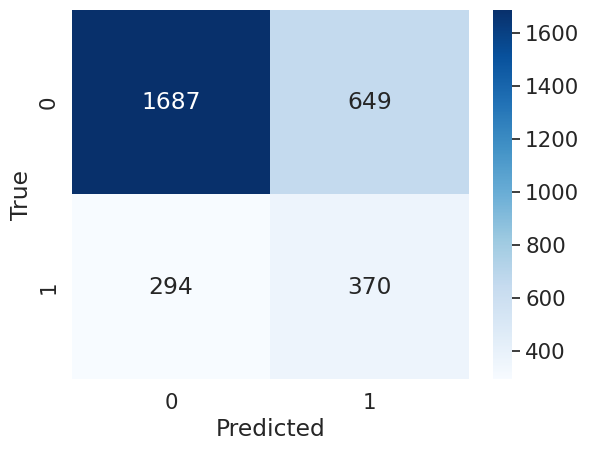

In [ ]:

X_train_copy = X_train_resampled.drop(['pay_4', 'pay_5', 'pay_6', 'bill_amt4', 'bill_amt5', 'bill_amt6'], axis=1)
X_test_copy = X_test.drop(['pay_4', 'pay_5', 'pay_6', 'bill_amt4', 'bill_amt5', 'bill_amt6'], axis=1)

logmodel2 = LogisticRegression(random_state=1)
# logmodel.fit(X_train_new,y_train_new)
scores = cross_val_score(logmodel2, X_train_copy, y_train_resampled, cv=5, scoring='accuracy')
# Calculate the mean and standard deviation of the F1 scores
f1_mean = scores.mean()
f1_std = scores.std()

# Print the cross-validation results
print("Cross-Validation Results:")
print("Accuracy Score - Mean:", f1_mean, "Std:", f1_std)

best_model = LogisticRegression(random_state=1, C=0.1)
best_model.fit(X_train_copy, y_train_resampled)
y_pred = best_model.predict(X_test_copy)
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Test-set F1 score:", f1)
print("Test-set accuracy:", acc)
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4) # Adjust font size
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Cross-Validation Results:
Accuracy Score - Mean: 0.8269021205946722 Std: 0.07592129783007592
Test-set F1 score: 0.45331325301204817
Test-set accuracy: 0.758
Confusion Matrix:


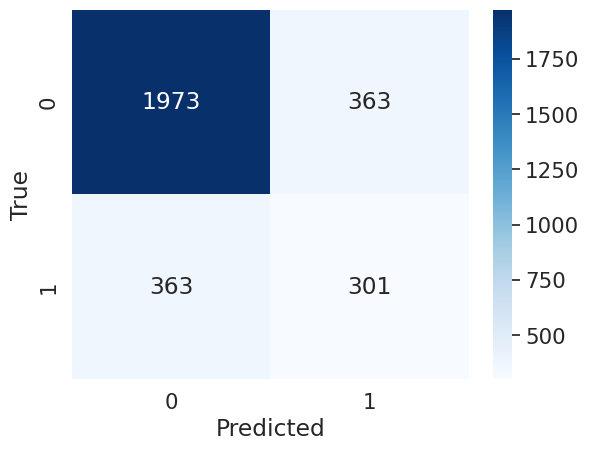

In [ ]:
# Define the best-fit model
best_model = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=1)

# Perform 5-fold cross-validation on the training set
scores = cross_val_score(best_model, X_train_copy, y_train_resampled, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the F1 scores
f1_mean = scores.mean()
f1_std = scores.std()

# Print the cross-validation results
print("Cross-Validation Results:")
print("Accuracy Score - Mean:", f1_mean, "Std:", f1_std)

# Retrain the model on the full training set
best_model.fit(X_train_copy, y_train_resampled)

# Evaluate the final model on the test set
y_pred = best_model.predict(X_test_copy)
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Test-set F1 score:", f1)
print("Test-set accuracy:", acc)

# Print the confusion matrix
print("Confusion Matrix:")
sns.set(font_scale=1.4) # Adjust font size
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Cross-Validation Results:
Accuracy Score - Mean: 0.7821965637813498 Std: 0.05548515330795261
Test-set F1 score: 0.4601186552406064
Test-set accuracy: 0.727


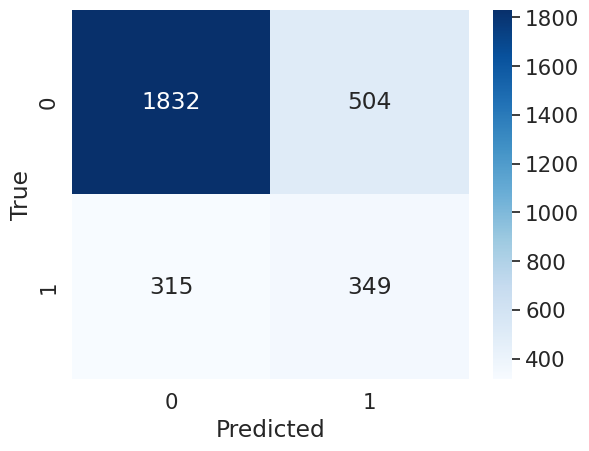

In [ ]:

svm = SVC(kernel='rbf', random_state=0)
scores = cross_val_score(svm, X_train_copy, y_train_resampled, cv=5, scoring='accuracy')
f1_mean = scores.mean()
f1_std = scores.std()

# Print the cross-validation results
print("Cross-Validation Results:")
print("Accuracy Score - Mean:", f1_mean, "Std:", f1_std)

best_model = SVC(kernel='rbf', random_state=0, C=1, gamma=0.1)
best_model.fit(X_train_copy, y_train_resampled)
y_pred = best_model.predict(X_test_copy)
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Test-set F1 score:", f1)
print("Test-set accuracy:", acc)
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4) # Adjust font size
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()








Best parameters for PCA-based SVM: {'C': 10, 'gamma': 10}
Best parameters for LDA-based SVM: {'C': 10, 'gamma': 0.1}
PCA-based SVM - Mean Accuracy: 0.7162352526853318 Std: 0.028383509431049263
LDA-based SVM - Mean Accuracy: 0.7371755590773024 Std: 0.05974028294990264
Best Classifier:
F1-score: 0.42680546519193235
Accuracy: 0.7063333333333334
Confusion Matrix:
[[1791  545]
 [ 336  328]]


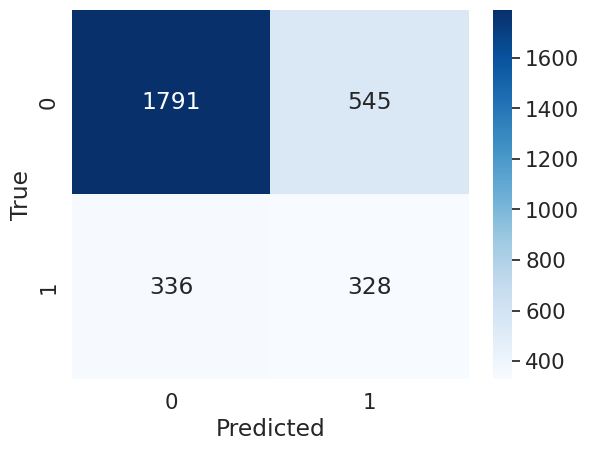

In [ ]:
# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_copy)
X_test_pca = pca.transform(X_test_copy)


# Apply LDA to reduce the dimensionality of the data
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_copy, y_train_resampled)
X_test_lda = lda.transform(X_test_copy)

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100]}

# Perform grid search on PCA-based SVM
svm_pca_gs = GridSearchCV(estimator=SVC(kernel='rbf', random_state=0),
                          param_grid=param_grid,
                          cv=5,
                          scoring='accuracy')
svm_pca_gs.fit(X_train_pca, y_train_resampled)
print("Best parameters for PCA-based SVM:", svm_pca_gs.best_params_)

# Perform grid search on LDA-based SVM
svm_lda_gs = GridSearchCV(estimator=SVC(kernel='rbf', random_state=0),
                          param_grid=param_grid,
                          cv=5,
                          scoring='accuracy')
svm_lda_gs.fit(X_train_lda, y_train_resampled)
print("Best parameters for LDA-based SVM:", svm_lda_gs.best_params_)

# Evaluate the best models using cross-validation
pca_scores = cross_val_score(svm_pca_gs.best_estimator_, X_train_pca, y_train_resampled, cv=5, scoring='accuracy')
f1_mean_pca = pca_scores.mean()
f1_std_pca = pca_scores.std()

lda_scores = cross_val_score(svm_lda_gs.best_estimator_, X_train_lda, y_train_resampled, cv=5, scoring='accuracy')
f1_mean_lda = lda_scores.mean()
f1_std_lda = lda_scores.std()

print("PCA-based SVM - Mean Accuracy:", f1_mean_pca, "Std:", f1_std_pca)
print("LDA-based SVM - Mean Accuracy:", f1_mean_lda, "Std:", f1_std_lda)

# Select the best model and fit it to the training data
if f1_mean_pca > f1_mean_lda:
    best_svm = svm_pca_gs.best_estimator_
    X_train_best = X_train_pca
    X_test_best = X_test_pca
else:
    best_svm = svm_lda_gs.best_estimator_
    X_train_best = X_train_lda
    X_test_best = X_test_lda

best_svm.fit(X_train_best, y_train_resampled)

# Compute and print the F1-score, accuracy, and confusion matrix for the best classifier
y_pred_best = best_svm.predict(X_test_best)
f1_best = f1_score(y_test, y_pred_best)
acc_best = accuracy_score(y_test, y_pred_best)
cm_best = confusion_matrix(y_test, y_pred_best)

print("Best Classifier:\nF1-score: {}\nAccuracy: {}\nConfusion Matrix:\n{}".format(f1_best, acc_best, cm_best))
sns.set(font_scale=1.4) # Adjust font size
sns.heatmap(cm_best, annot=True, fmt='g', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

We see that Customers who are female, have higher levels of education, are single, and fall within the age range of 30-40 years old are more likely to make payments on time.